# Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=pd.read_csv('Iris.csv')

# Extracting input and output columns

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X=iris.iloc[:,1:3].values

In [5]:
species=iris['Species'].replace({'Iris-versicolor':0,'Iris-virginica':1,'Iris-setosa':2})

In [6]:
y=species.values

In [7]:
X.shape

(150, 2)

In [8]:
y.shape

(150,)

# Splitting the model 

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [10]:
X_train.shape

(120, 2)

In [11]:
X_test.shape

(30, 2)

# Training the model

In [12]:
#Using square root method
np.sqrt(X_train.shape[0])

10.954451150103322

In [13]:
k=10

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

# Predicting accuracy

In [16]:
y_pred=knn.predict(X_test)

In [17]:
y_pred

array([0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 0, 2], dtype=int64)

In [18]:
y_test

array([1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 2, 1, 2, 0, 2], dtype=int64)

In [19]:
y_pred.shape

(30,)

In [20]:
y_test.shape

(30,)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[9, 4, 0],
       [5, 3, 0],
       [0, 0, 9]], dtype=int64)

In [23]:
#training model by trial and error method
accuracy=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

In [24]:
len(accuracy)

25

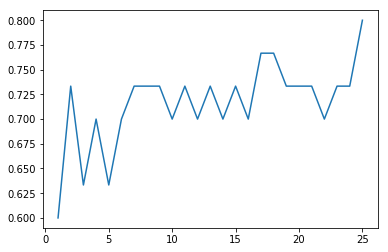

In [25]:
plt.plot(range(1,26),accuracy)

In [26]:
knn=KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8

# Function for user defined inputs

In [27]:
def predict_species():
    sepal_length=float(input("Enter the sepal Length: "))
    sepal_width=float(input("Enter the sepal_width: "))
    
    X_new=np.array([[sepal_length],[sepal_width]]).reshape(1,2)
    
    if knn.predict(X_new)[0]==0:
        return 'The species is Iris-versicolor'
    elif knn.predict(X_new)[0]==1:
        return 'The species is Iris-virginica'
    else:
        return 'The species is Iris-setosa'

In [28]:
predict_species()

Enter the sepal Length: 5.1
Enter the sepal_width: 7.1


'The species is Iris-setosa'

# Creating Decision Boundaries

In [29]:
#Creating a meshgrid
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [30]:
a.shape

(560,)

In [31]:
b.shape

(390,)

In [32]:
XX,YY=np.meshgrid(a,b)

In [33]:
XX.shape

(390, 560)

In [34]:
YY.shape

(390, 560)

In [35]:
#classifying every point on the meshgrid
input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)

In [36]:
labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

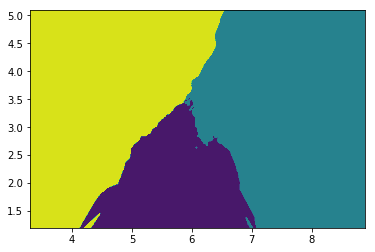

In [37]:
#plotting the array as an image
plt.contourf(XX,YY,labels.reshape(XX.shape))

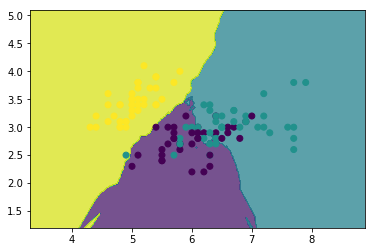

In [38]:
#plotting all the training data on the plot
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)